In [2]:
from skimage import io, transform, color, exposure
from skimage.feature import hog
from commonfunctions import *
from skimage.color import rgb2gray, rgb2hsv
from scipy.signal import convolve2d
import numpy as np



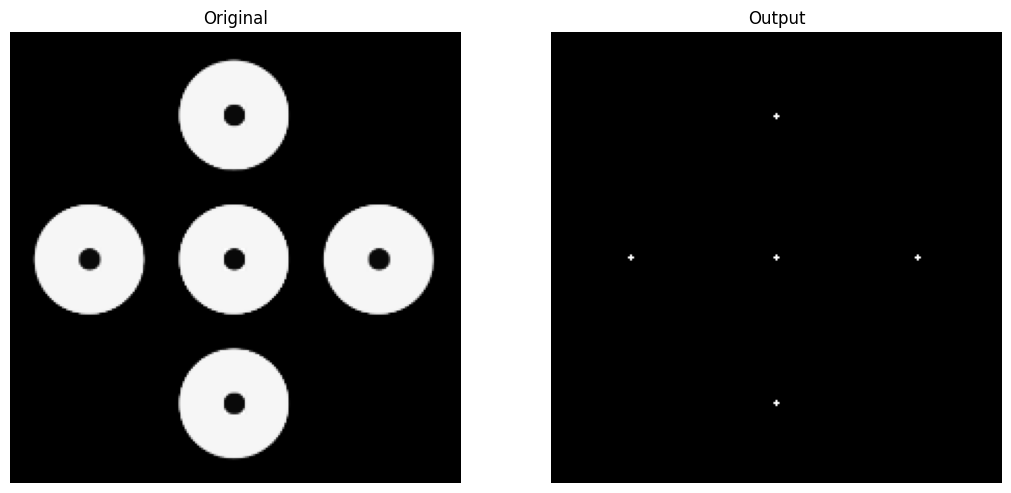

In [3]:
import cv2
import numpy as np


def find_circle_center(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    circles =cv2.HoughCircles(img,  
                   cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=50, param2=30, minRadius=10, maxRadius=100) 


    if circles is not None:
        # Get the (x, y, r) as integers
        circles = np.round(circles[0, :]).astype("int")
        
        # loop over the circles
        for (x, y, r) in circles:
            # draw the circle in the output image
            #cv2.circle(output, (x, y), r, (0, 255, 0), 2)
            center=(x,y)
            cv2.circle(output, center,1, (255, 255, 255),thickness=-1)


image = cv2.imread('Q2.png')
output = np.zeros_like(image)
res = find_circle_center(cv2.imread('Q2.png'))
show_images([image, output], ["Original", "Output"])    

# can be acheived through one dilation and one erosion



(256,)


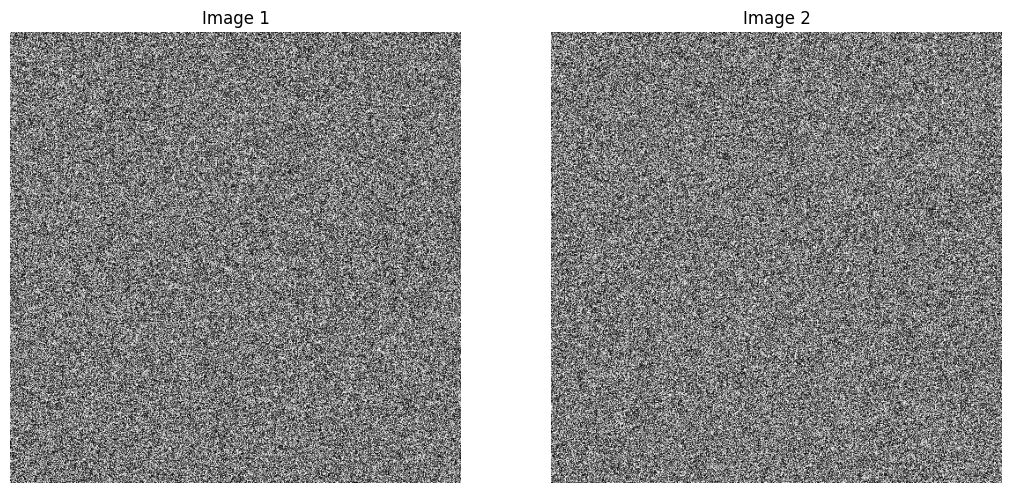

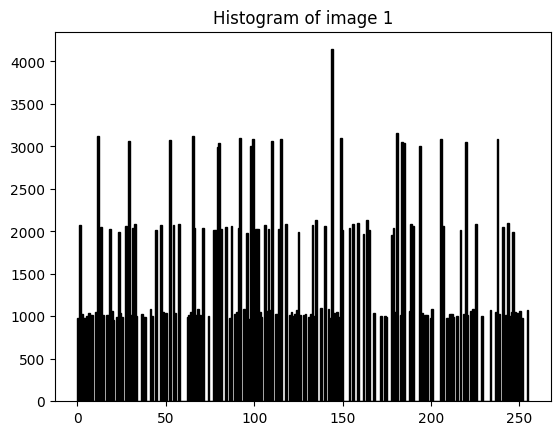

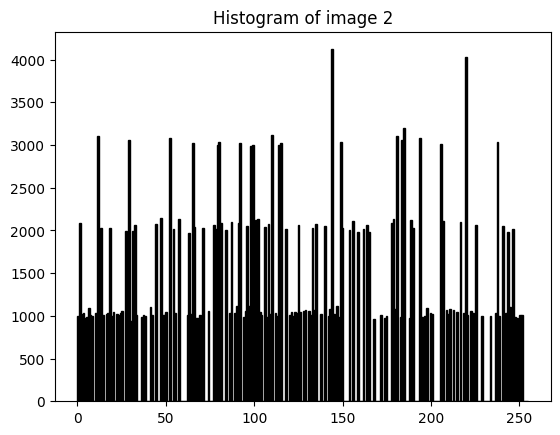

In [4]:
# Create 2 grayscale images having identical histograms but different textures. (Note: it’s 

# Generate two images with identical histograms but different textures
def generate_image_with_histogram(hist, shape):
    # Create a random image
    image = np.random.randint(0, 256, shape, dtype=np.uint8)

    # Equalize the histogram to match the specified histogram
    equalized_image = cv2.equalizeHist(image)
    
    # Apply the specified histogram
    matched_image = cv2.LUT(equalized_image, hist)

    return matched_image

# Generate a random histogram
random_hist = np.random.randint(0, 256, 256, dtype=np.uint8)
print(random_hist.shape)
# Create two images with the same histogram
image_shape = (512, 512)
image1 = generate_image_with_histogram(random_hist, image_shape)
image2 = generate_image_with_histogram(random_hist, image_shape)


show_images([image1, image2], ["Image 1", "Image 2"])

#  show the histograms of the two images. (Note: use the function hist from matplotlib.pyplot)
plt.figure()
plt.hist(image1.ravel(), bins=256, range=(0, 255), fc='k', ec='k')
plt.title("Histogram of image 1")
plt.figure()
plt.hist(image2.ravel(), bins=256, range=(0, 255), fc='k', ec='k')
plt.title("Histogram of image 2")
plt.show()

